In [1]:
# Necessary imports
import numpy as np
import cv2
import glob

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from skimage.feature import hog

from scipy.ndimage.measurements import label

from utils import *

# Read in images and create classes for cars and non cars

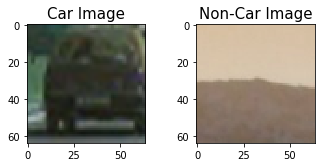

In [2]:
# Read in cars and non cars 

# Standard dataset
cars = glob.glob('vehicles/*/*.png')
non_cars = glob.glob('non-vehicles/*/*.png')

# Randomly display a car and non car image
random = np.random.randint(0, len(cars))
car_img = cv2.imread(cars[random])
non_car_img = cv2.imread(non_cars[random])

ShowTwoImages(car_img, non_car_img, "Car Image", "Non-Car Image")

# Sample HOG detection and visualization

/academics/conda/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


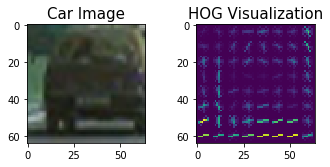

In [3]:
gray = cv2.cvtColor(car_img, cv2.COLOR_RGB2GRAY)

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2

# Call our function with vis=True to see an image output
# use feature_vec as false for now
features, hog_img = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)



# Plot the examples
ShowTwoImages(car_img, hog_img, "Car Image", "HOG Visualization")

# Extract features and visualize a sample

In [4]:
color_space = 'YCrCb'
spatial_size = (32,32)
hist_bins = 32
hist_range = (0,256)
hog_channel= 'ALL'
spatial_feat = True
hist_feat = True
hog_feat = True

car_features = extract_features(cars, orient, pix_per_cell, cell_per_block, 
                                cspace=color_space, spatial_size=spatial_size,
                                hist_bins=hist_bins, hist_range=hist_range,
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)
non_car_features = extract_features(non_cars, orient, pix_per_cell, cell_per_block, 
                                cspace=color_space, spatial_size=spatial_size,
                                hist_bins=hist_bins, hist_range=hist_range,
                                hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                hist_feat=hist_feat, hog_feat=hog_feat)


/academics/conda/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [5]:
# Append and normalize features
X = np.vstack((car_features, non_car_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

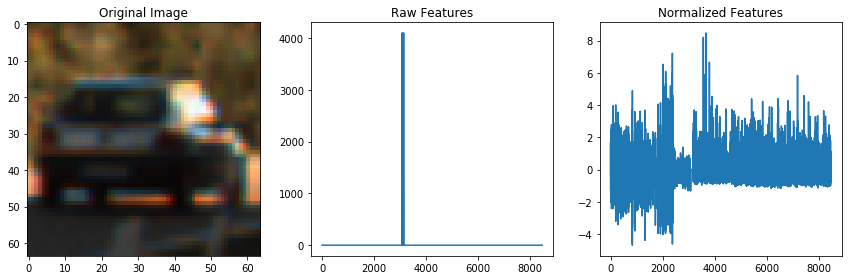

In [6]:
# Plot an example of raw and scaled features
car_ind = np.random.randint(0, len(cars))
fig = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(mpimg.imread(cars[car_ind]))
plt.title('Original Image')
plt.subplot(132)
plt.plot(X[car_ind])
plt.title('Raw Features')
plt.subplot(133)
plt.plot(scaled_X[car_ind])
plt.title('Normalized Features')
fig.tight_layout()


# Randomize samples and add labels

In [7]:
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(non_car_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460


# Train Classifier

In [8]:
import time

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

65.4 Seconds to train SVC...
Test Accuracy of SVC =  0.9885


# Check result on a sample image

In [ ]:
def test_sample_image(image):
    windows = slide_window(image, x_start_stop=[600, 1280], y_start_stop=[400, 720], 
                        xy_window=(96, 96), xy_overlap=(0.5, 0.5))

    # Return all the windows the classifier has predicted contain car(s) ('positive windows').
    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       

    # Draw bounding boxes around the windows that the classifier predicted has cars in them
    window_img = draw_boxes(image, hot_windows, color=(255, 0, 255), thick=6)                    
    return window_img

# Read in image
test_image_number = 3
test_image = mpimg.imread('test_images/test' + str(test_image_number) + '.jpg')
test_image = test_image.astype(np.float32)/255

window_img = test_sample_image(test_image)
    
# Plot image with bounding boxes drawn.
plt.imshow(window_img)